In [6]:
import re, json, subprocess
import pandas as pd
import matplotlib.pyplot as plt

from modules.benchinfo import *

%matplotlib inline

In [2]:
n = 10
inputstr =                                              \
    '#include <stdlib.h>\n'                             \
    '#include <stdio.h>\n'                              \
    '\n'                                                \
    'int main(int argc, char *argv[])\n'                \
    '{\n'                                               \
    '  int a, b = 0;\n'                                 \
    '  print("Hello world!\\n");\n'                     \
    '}\n'
llvm_path = '/home/condekind/LLVM/10/build/bin/'

In [3]:
df = pd.read_pickle('cache/stats.pkl.bz2')
df.index.names = ['suite', 'name']
benchmarkContainer = {
    'referenceFeatures': { k: 0 for k in BenchmarkFeatures },
    'closestBenchs': [ _ for _ in df.head(n) ],  # closest n in df (not implemented)
}

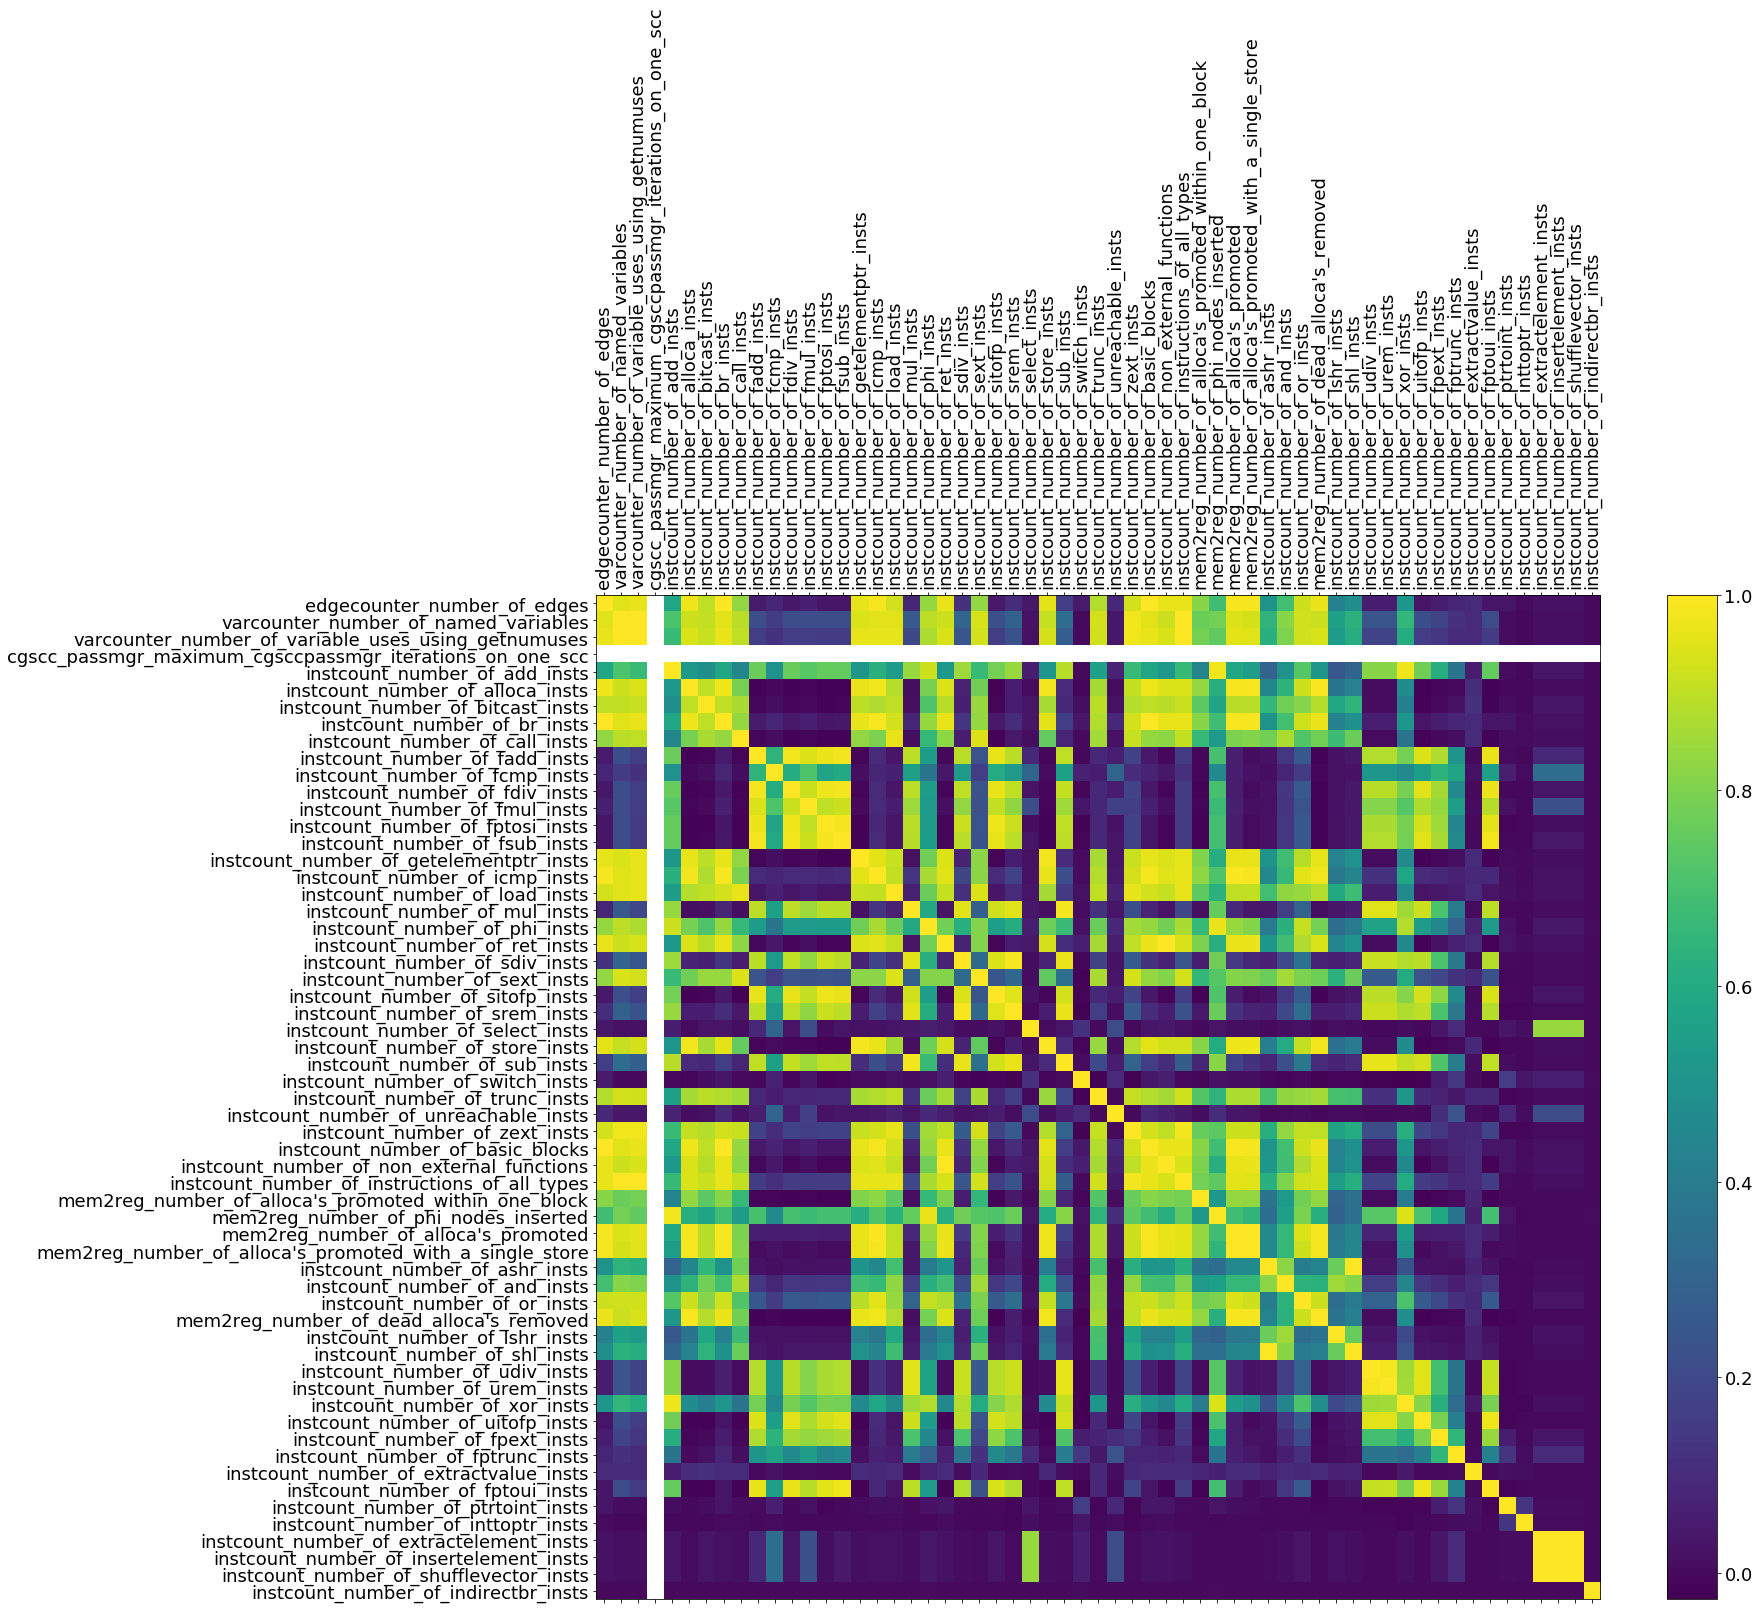

In [10]:
f = plt.figure(figsize=(24, 18))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=18, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
# plt.title('', fontsize=16)

<hr></hr>

In [ ]:
def llvm_stat_clean(stat_line):
    result = [_ for _ in stat_line.strip().split(maxsplit=3)]
    return result[1], result[3], result[0]

user_stats = subprocess.run('scripts/extract.sh',
                                input=inputstr,
                                capture_output=True,
                                text=True)
[
    llvm_stat_clean(line)
    for line in
        user_stats.stderr.split('\n')
    if
        re.search('^ *\d+\s+\S+\s+-\s+.*', line) != None
]

In [ ]:
def copy_features(dest, features):
    for p, d, n in features:  # pass, description, number
        if p in dest:
            if d in dest[p]:
                dest[p][d] += int(n)
            else:
                dest[p][d] = int(n)
        else:
            dest[p] = { d: int(n) }
            
def closest(*, program, df):
    #

In [ ]:
def gen_bench():
    return {
        "name": random.choice(bNames),
        "suite": random.choice(sNames),
        "content": random.choice(bCode),
        "features": {
            random.choice(): n
            for //
        }
    }

In [ ]:
#export interface Benchmark {
#  name: string
#  suite: string
#  content: string
#  features: BenchmarkFeatures
#}
#
#export interface BenchmarkContainer {
#  referenceFeatures: BenchmarkFeatures,
#  closestBenchs: Array<Benchmark>
#}